In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [26]:
#helpful link to refer to
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

In [2]:
combined_df = pd.read_csv('crime_politics.csv')
combined_df

,Unnamed: 0,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,...,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,111023,2020,WY,West,5,2020-11-29,6,White,2,Intimidation,...,Anti-Lesbian (Female),Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219573,111024,2020,WY,West,5,2020-07-14,0,Unknown,1,Destruction/Damage/Vandalism of Property,...,Anti-White,Government,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219574,111025,2020,WY,West,5,2020-10-16,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219575,111026,2020,WY,West,5,2020-01-30,1,White,1,Simple Assault,...,Anti-Female,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided


In [3]:
combined_df.columns

Index(['Unnamed: 0', 'DATA_YEAR', 'STATE_ABBR', 'REGION_NAME',
       'POPULATION_GROUP_CODE', 'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT',
       'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME',
       'BIAS_DESC', 'VICTIM_TYPES', 'CONGRESS', 'YEAR_START', 'YEAR_END',
       'HOUSE_MAJORITY', 'SENATE_MAJORITY', 'PRESIDENCY', 'PRESIDENT',
       'PARTY_GOVERNMENT'],
      dtype='object')

In [4]:
combined_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
combined_df.head()

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided


In [8]:
#index state column
combined_df = combined_df.set_index('STATE_ABBR')

In [9]:
combined_df

,DATA_YEAR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
STATE_ABBR,,,,,,,,,,,,,,,,,,,
AR,1991,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
AR,1991,South,6,1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
AR,1991,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
AR,1991,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
AR,1991,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY,2020,West,5,2020-11-29,6,White,2,Intimidation,Park/Playground,Anti-Lesbian (Female),Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
WY,2020,West,5,2020-07-14,0,Unknown,1,Destruction/Damage/Vandalism of Property,Park/Playground,Anti-White,Government,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
WY,2020,West,5,2020-10-16,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-White,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided


## EDA

In [ ]:
combined_df['STATE_ABBR'].value_counts()

## Encode categorical data


In [10]:
for col in combined_df:
    if (combined_df[col].dtypes) == object:
        print(col, combined_df[col].dtypes)

REGION_NAME object
POPULATION_GROUP_CODE object
INCIDENT_DATE object
OFFENDER_RACE object
OFFENSE_NAME object
LOCATION_NAME object
BIAS_DESC object
VICTIM_TYPES object
HOUSE_MAJORITY object
SENATE_MAJORITY object
PRESIDENCY object
PRESIDENT object
PARTY_GOVERNMENT object


In [11]:
for col in combined_df:
    if (combined_df[col].dtypes) == object:
        combined_df[col] = combined_df[col].astype('category')
        combined_df[col] = combined_df[col].cat.codes 

In [12]:
combined_df.dtypes

DATA_YEAR                int64
REGION_NAME               int8
POPULATION_GROUP_CODE     int8
INCIDENT_DATE            int16
TOTAL_OFFENDER_COUNT     int64
OFFENDER_RACE             int8
VICTIM_COUNT             int64
OFFENSE_NAME             int16
LOCATION_NAME             int8
BIAS_DESC                 int8
VICTIM_TYPES              int8
CONGRESS                 int64
YEAR_START               int64
YEAR_END                 int64
HOUSE_MAJORITY            int8
SENATE_MAJORITY           int8
PRESIDENCY                int8
PRESIDENT                 int8
PARTY_GOVERNMENT          int8
dtype: object

## Normalizing

In [13]:
combined_df.describe()

,DATA_YEAR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
count,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000
mean,2005.472691,2.443562,6.152047,5469.121443,0.955724,4.906702,1.247567,219.571790,29.031397,13.416551,3.162271,108.983523,2004.967046,2006.967046,0.672466,1.436876,0.488093,1.904776,1.400292
std,8.591466,1.958412,4.444662,3141.739711,1.358364,1.374180,2.274116,99.206725,8.931027,10.147162,1.213311,4.284975,8.569949,8.569949,0.469315,0.986412,0.499859,1.415292,0.750036
min,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1991.000000,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.000000,1.000000,3.000000,2793.000000,0.000000,5.000000,1.000000,181.000000,24.000000,4.000000,3.000000,105.000000,1997.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2005.000000,3.000000,5.000000,5287.000000,1.000000,5.000000,1.000000,266.000000,32.000000,13.000000,3.000000,109.000000,2005.000000,2007.000000,1.000000,2.000000,0.000000,2.000000,1.000000
75%,2013.000000,5.000000,8.000000,8142.000000,1.000000,6.000000,1.000000,266.000000,35.000000,17.000000,3.000000,113.000000,2013.000000,2015.000000,1.000000,2.000000,1.000000,3.000000,2.000000
max,2020.000000,5.000000,19.000000,10957.000000,99.000000,6.000000,900.000000,352.000000,44.000000,34.000000,8.000000,116.000000,2019.000000,2021.000000,1.000000,3.000000,1.000000,4.000000,3.000000


In [14]:
#back up df before normalizing
combined_backup = combined_df

In [17]:
normalize = Normalizer()
X_norm = normalize.fit_transform(combined_df)

#turn output array into a df
norm_combined_df = pd.DataFrame(X_norm, columns = combined_backup.columns)

In [18]:
norm_combined_df

,DATA_YEAR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,0.573782,0.000865,0.002017,0.069741,0.000288,0.001729,0.000288,0.076658,0.006917,0.001153,0.000865,0.029395,0.573782,0.574358,0.0,0.000000,0.000288,0.000288,0.000288
1,0.572529,0.000863,0.002300,0.075053,0.000288,0.000575,0.000288,0.096620,0.006901,0.009489,0.000863,0.029331,0.572529,0.573104,0.0,0.000000,0.000288,0.000288,0.000288
2,0.576055,0.000868,0.001447,0.053237,0.000289,0.000579,0.000289,0.000000,0.010127,0.001157,0.000868,0.029512,0.576055,0.576634,0.0,0.000000,0.000289,0.000289,0.000289
3,0.573791,0.000865,0.001441,0.102885,0.000288,0.000576,0.000576,0.006052,0.006917,0.009510,0.000865,0.029396,0.573791,0.574368,0.0,0.000000,0.000288,0.000288,0.000288
4,0.573794,0.000865,0.001441,0.102597,0.000288,0.000576,0.000288,0.000000,0.011528,0.009510,0.000865,0.029396,0.573794,0.574371,0.0,0.000000,0.000288,0.000288,0.000288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,0.176030,0.000436,0.000610,0.952045,0.000523,0.000523,0.000174,0.023180,0.002789,0.001481,0.000261,0.010109,0.175943,0.176117,0.0,0.000174,0.000087,0.000349,0.000000
219573,0.178094,0.000441,0.000617,0.951037,0.000000,0.000441,0.000088,0.015958,0.002821,0.002909,0.000176,0.010227,0.178005,0.178182,0.0,0.000176,0.000088,0.000353,0.000000
219574,0.176722,0.000437,0.000612,0.951938,0.000087,0.000175,0.000087,0.000000,0.003062,0.002887,0.000262,0.010148,0.176635,0.176810,0.0,0.000175,0.000087,0.000350,0.000000
219575,0.180548,0.000447,0.000626,0.949308,0.000089,0.000536,0.000089,0.030032,0.003128,0.000715,0.000268,0.010368,0.180459,0.180638,0.0,0.000179,0.000089,0.000358,0.000000


## Perform k-means clustering

In [22]:
inertias = []

for k in range(1,11):
    #build and fit the model
    model = KMeans(n_clusters=k)
    #model.fit(X)
    model.fit(X_norm)
    inertia = model.inertia_
    inertias.append(inertia)

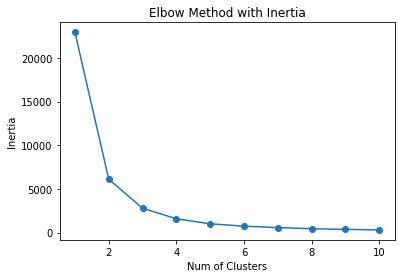

In [27]:
#plot inertia with k values
plt.plot(range(1,11), inertias, '-o')
plt.xlabel('Num of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertia')
plt.show()

The optimized number of clusters is 3

In [28]:
model = KMeans(n_clusters = 3)
model.fit(X_norm)
clusters = model.predict(X_norm)

In [33]:
#add clusters to df and rename
combined_clusters = pd.DataFrame(X_norm, columns = combined_backup.columns, index = combined_backup.index)
combined_clusters['clusters'] = clusters
combined_clusters.head()

,DATA_YEAR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT,clusters
STATE_ABBR,,,,,,,,,,,,,,,,,,,,
AR,0.573782,0.000865,0.002017,0.069741,0.000288,0.001729,0.000288,0.076658,0.006917,0.001153,0.000865,0.029395,0.573782,0.574358,0.0,0.0,0.000288,0.000288,0.000288,0
AR,0.572529,0.000863,0.002300,0.075053,0.000288,0.000575,0.000288,0.096620,0.006901,0.009489,0.000863,0.029331,0.572529,0.573104,0.0,0.0,0.000288,0.000288,0.000288,0
AR,0.576055,0.000868,0.001447,0.053237,0.000289,0.000579,0.000289,0.000000,0.010127,0.001157,0.000868,0.029512,0.576055,0.576634,0.0,0.0,0.000289,0.000289,0.000289,0
AR,0.573791,0.000865,0.001441,0.102885,0.000288,0.000576,0.000576,0.006052,0.006917,0.009510,0.000865,0.029396,0.573791,0.574368,0.0,0.0,0.000288,0.000288,0.000288,0
AR,0.573794,0.000865,0.001441,0.102597,0.000288,0.000576,0.000288,0.000000,0.011528,0.009510,0.000865,0.029396,0.573794,0.574371,0.0,0.0,0.000288,0.000288,0.000288,0


## Analyzing results using PCA

In [35]:
from sklearn.decomposition import PCA

#create a PCA model to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X_norm)

PCA(n_components=2)

In [36]:
#transform the scaled data to a new PCA space
X_reduced = pca.transform(X_norm)

In [37]:
#confirm the new vector space and clusters
#convert to a df

X_reduced_df = pd.DataFrame(X_reduced, index=combined_backup.index, columns=['PC1','PC2'])
X_reduced_df['clusters'] = clusters
X_reduced_df.head()

,PC1,PC2,clusters
STATE_ABBR,,,
AR,0.764687,0.154967,0
AR,0.760174,0.151883,0
AR,0.776284,0.167341,0
AR,0.737376,0.136265,0
AR,0.737363,0.136749,0


In [39]:
#apply the same PCA transformation to the centroids

centres_reduced = pca.transform(model.cluster_centers_)

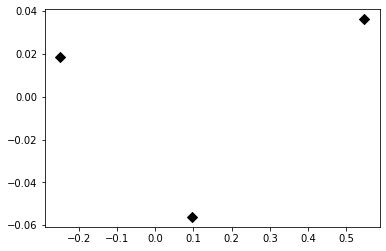

In [41]:
#display the data points and centroids
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='D', s=50, color='k')